# Про Pandas

Бібліотека `pandas` надає доступ до швидких та простих у використанні структур даних та інструментів аналізу даних. Головна структура даних - це `DataFrame`, про яку можна думати як про двовимірну (2D) таблицю в пам'яті (in-memory 2D table), схоже на таблицю Excel, з іменами колонок та підписами (labels) рядків. Багато функцій, які є в Excel, можна реалізувати і програмно, кодом. Наприклад, для створення зведених таблиць (pivot tables), обчислювання стовпців на основі інших стовпців, побудови графіків тощо. Також можна групувати рядки за значеннями стовпців або об'єднувати таблиці, як в SQL. Pandas також чудово працює з часовими рядами (time series).

# Налаштування

Для початку `pandas` треба імпортувати. Зазвичай, його імпортують як `pd`:

In [1]:
import pandas as pd

# Об'єкти `Series`

Бібліотека pandas містить наступні корисні структури даних:
* об'єкти `Series`. Це одновимірні (1D) масиви, схожі до колонок в електронних таблицях (spreadsheet, з іменем колонки та лейблами рядків).
* об'єкти `DataFrame`. Це двовимірні (2D) таблиці, схожі на електронні таблиці (spreadsheet, з іменами колонок та лейблами рядків).
* об'єкти `Panel`. Про `Panel` можна думати, як про словник (dictionary) `DataFrame`ів. Вони використовуються не дуже часто.

## Створення `Series`

Почнімо зі створення нашого першого об'єкту `Series`

In [2]:
s = pd.Series([2, -1, 3, 5])
s

,0
0,2
1,-1
2,3
3,5


## Схожість з одновимірним `ndarray`

Об'єкти `Series` ведуть себе дуже схоже до одновимірних масивів з NumPy - `ndarray`. Їх навіть можна надавати як параметри для функцій NumPy.

In [3]:
import numpy as np
np.exp(s)

,0
0,7.389056
1,0.367879
2,20.085537
3,148.413159


Проведення арифметичних операцій над `Series` також можливі, і виконуються вони поелементно, як і над `ndarray`:

In [4]:
s + [1000, 2000, 3000, 4000]

,0
0,1002
1,1999
2,3003
3,4005


Схоже до NumPy, якщо додати лише одне число до `Series`, це число буде додано до всіх елементів в `Series`. Це називається **бродкастином (broadcasting)**:

In [5]:
s + 1000

,0
0,1002
1,999
2,1003
3,1005


Це також справджується і для всіх бінарних операцій, як от `*` або `/`, а також і для умовних операцій:

In [6]:
s < 0

,0
0,False
1,True
2,False
3,False


## Індексні позначки (index labels)

Кожен елемент в об'єкті `Series` має свій унікальний ідентифікатор, який називається *індексною позначкою (index label)*. За замовчуванням, це просто ранг елементу в `Series` (починаючи з `0`), але індекти можна зробити і вручну:

In [7]:
s2 = pd.Series([68, 83, 112, 68], index=['alice', 'bob', 'charles', 'darwin'])
s2

,0
alice,68
bob,83
charles,112
darwin,68


Завдяки цьому, `Series` можна використовувати так само, як і `dict`:

In [8]:
s2['bob']

83

Щоб було зрозуміліше, коли ти отримуєш доступ по *label* або по *integer location*, рекомендовано завжди використовувати атрибут `loc` коли по `label` та `iloc`, якщо по *integer location*

In [9]:
s2.loc['bob']

83

In [10]:
s2.iloc[1]

83

Розділення (slicing) `Series` також ділить і index labels:

In [11]:
s2.iloc[1:3]

,0
bob,83
charles,112


Це може призвести до неочікуваних результатів, якщо використовуються нумеровані лейбли (numeric labels) за замовчуванням, тому треба бути обережним:

In [12]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

,0
0,1000
1,1001
2,1002
3,1003


In [14]:
surprise_slice = surprise[2:]
surprise_slice

,0
2,1002
3,1003


Що ми маємо. Перший елемент має індекс `2`. Елементу з індексом `0` немає в розрізі (slice).

In [15]:
try:
  surprise_slice[0]
except KeyError as e:
  print("Key error:", e)

Key error: 0


Але варто запам'ятати, що отримати доступ до елементів по *integer location* можна за допомогою атрибуту `iloc`. Це демонструє ще одну причину, чому завжди краще користуватись `loc` та `iloc` для доступу в об'єкті `Series`:

In [16]:
surprise_slice.iloc[0]

1002

## Ініціалізація зі словника (init from `dict`)

Об'єкт `Series` можна створити з `dict`. Ключі будуть використані як *index labels*:

In [19]:
weights = {'alice': 68, 'bob': 83, 'colin': 86, 'darwin': 68}
s3 = pd.Series(weights)
s3

,0
alice,68
bob,83
colin,86
darwin,68


Можна контролювати, який елемент хочеться додати в `Series`, а також в якому порядку, явно (explicitly) специфікуючи бажаний `index`:

In [20]:
s4 = pd.Series(weights, index = ['colin', 'alice'])
s4

,0
colin,86
alice,68


## Автоматичне вирівнювання (automatic alignment)

Коли операція включає в себе декілька об'єктів `Series`, `pandas` автоматично вирівнює (aligns) елементи, зіставляючи (by matching) index labels.

In [22]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


,0
alice,136.0
bob,166.0
charles,NaN
colin,NaN
darwin,136.0


`Series`, яка вийшла в результаті, містить в собі об'єднання (union) з index labels з `s2` та `s3`. Оскільки `"colin"` немає в `s2` і `"charles"` немає в `s3`, ці елементи матимуть результуюче значення `NaN` (Not-a-Number означає, що *значення немає*).

Автоматичне вирівнювання дуже стає у нагоді при роботі з даними, які надходять з різних джерел з різною стуктурою та відсутніми елементами. Але якщо ви забудете встановити правильні index labels, можна отримати незвичайні результати:



In [27]:
s5 = pd.Series([1000, 1000, 1000, 1000])

# або
# arr = np.ones(4, dtype='int64')*1000
# s5 = pd.Series(arr)

print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


,0
alice,NaN
bob,NaN
charles,NaN
darwin,NaN
0,NaN
1,NaN
2,NaN
3,NaN


Pandas не може вирівняти `Series`, оскільки їхні лейбли взагалі не збігаються, звідси й усі `NaN` результати.

## Ініціалізація зі скаляром (init with a scalar)

Об'єкт `Series` можна ініціалізувати використовуючи скаляр та список з index labels: всі елементи будуть встановлені до скаляра.

*Скаляр - це число.*

In [31]:
meaning = pd.Series(42, ['life', 'universe', 'everything'])
meaning

,0
life,42
universe,42
everything,42


## Назва, ім'я `Series`

`Series` може мати `name`:

In [32]:
s6 = pd.Series([83, 68], index=['bob', 'alice'], name='weights')
s6

,weights
bob,83
alice,68


## Побудова графіка (plotting) `Series`

Pandas робить легким побудову графіка з даними `Series`, вокристовуючи matplotlib. Треба просто імпортувати matplotlib та викликати метод `plot()`:

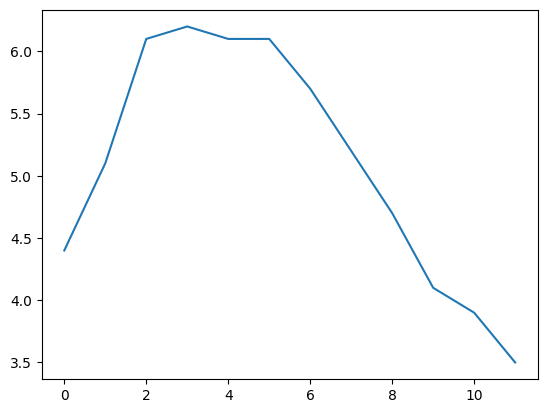

In [34]:
import matplotlib.pyplot as plt
temperatures = [4.4, 5.1, 6.1, 6.2, 6.1, 6.1, 5.7, 5.2, 4.7, 4.1, 3.9, 3.5]
s7 = pd.Series(temperatures, name='Temperatures')
s7.plot()
plt.show()

Існує *багато* різних опцій для побудови графіків даних. Щоб подивитись, які типи графіків доступні в pandas, можна перейти до секції [Візуалізація](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) в офіційній документації.

# Керування часом (handling time)

Багато наборів даних (datasets) мають часові мітки (timestamps), і pandas чудово підходить для маніпуляції такими даними:
* він може репрезентувати періоди (як от 2016Q3) та частоту (як от "monthly"),
* він може конвертувати періоди на фактичні часові мітки та навпаки,
* він може повторно зібрати дані та агрегувати значення як заманеться,
* а також може оперувати часовими зонами.

## Часовий діапазон

Почнімо зі створення часового ряду використовуючи `pd.date_range()`. Він повертає `DatetimeIndex`, який містить одну дату за годину (datetime per hour) протягом 12 годин, починаючи з 1 вересня 2024 року о 17:30.

In [39]:
dates = pd.date_range('2024/09/01 5:30pm', periods=12, freq='h')
dates

DatetimeIndex(['2024-09-01 17:30:00', '2024-09-01 18:30:00',
               '2024-09-01 19:30:00', '2024-09-01 20:30:00',
               '2024-09-01 21:30:00', '2024-09-01 22:30:00',
               '2024-09-01 23:30:00', '2024-09-02 00:30:00',
               '2024-09-02 01:30:00', '2024-09-02 02:30:00',
               '2024-09-02 03:30:00', '2024-09-02 04:30:00'],
              dtype='datetime64[ns]', freq='H')

Цей `DatetimeIndex` можна використати як індекс в `Series`:

In [40]:
temp_series = pd.Series(temperatures, dates)
temp_series

,0
2024-09-01 17:30:00,4.4
2024-09-01 18:30:00,5.1
2024-09-01 19:30:00,6.1
2024-09-01 20:30:00,6.2
2024-09-01 21:30:00,6.1
2024-09-01 22:30:00,6.1
2024-09-01 23:30:00,5.7
2024-09-02 00:30:00,5.2
2024-09-02 01:30:00,4.7
2024-09-02 02:30:00,4.1


Тепер можна побудувати графік цього ряду:

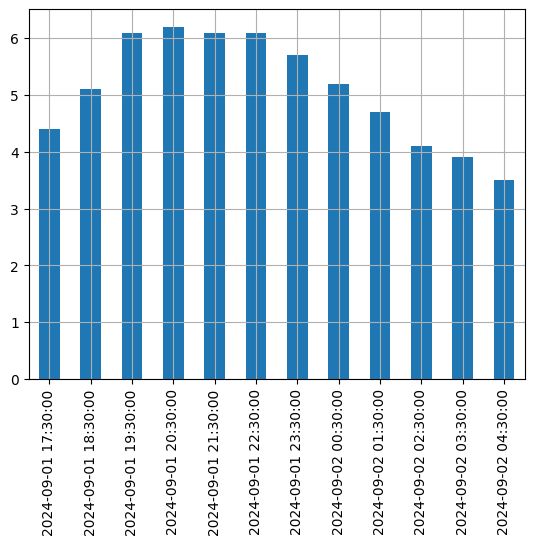

In [41]:
temp_series.plot(kind='bar')

plt.grid(True)
plt.show()

## Повторна вибірка (resampling)

Pandas дозволяє дуже легко зробити повторну вибірку часового ряду. Можна просто викликати метод `resample()` та уточнити нову частоту:

In [54]:
temp_series_freq_2h = temp_series.resample('2h')
temp_series_freq_2h

Операція повторної вибірки насправді є відкладеною (deferred) операцією, тому ми отримали не об'єкт `Series`, а об'єкт `DatetimeIndexResampler`. Щоб насправді виконати операцію повторної вибірки, можна просто викликати метод `mean()`. Pandas порахує середнє значення кожної пари послідовних годин (consecutive hours).

In [55]:
temp_series_freq_2h = temp_series_freq_2h.mean()

Тепер можна побудувати графік результату:

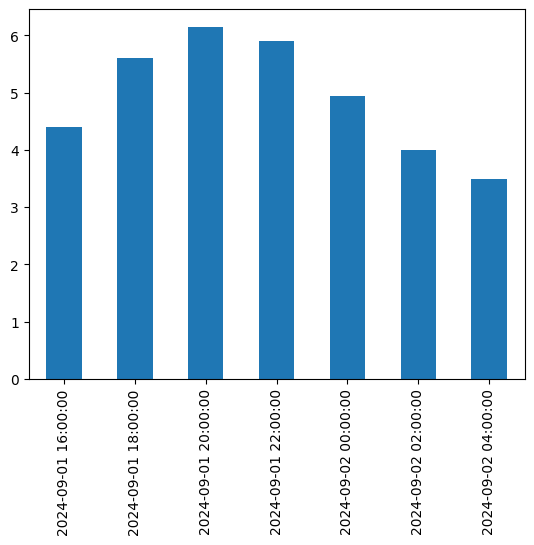

In [56]:
temp_series_freq_2h.plot(kind='bar')
plt.show()

Варто зазначити, що значення було автоматично агреговано (aggregated) в двогодинні періоди. Якщо ми подивимось на період 6-8pm, наприклад, ми мали значення `5.1` о 6:30pm та `6.1` о 7:30pm. Після повторної вибірки, ми маємо лише одне значення 5.6, яке є середнім значенням між `5.1` та `6.1`. Замість обрахування середнього значення, ми могли б використати будь-яку іншу функцію агрегування. Наприклад, ми можемо вирішити зберегти мінімальне значення кожного періоду:

In [57]:
temp_series_freq_2h = temp_series.resample('2h').min()
temp_series_freq_2h

,0
2024-09-01 16:00:00,4.4
2024-09-01 18:00:00,5.1
2024-09-01 20:00:00,6.1
2024-09-01 22:00:00,5.7
2024-09-02 00:00:00,4.7
2024-09-02 02:00:00,3.9
2024-09-02 04:00:00,3.5


Або, так само, можна використати метод `apply()`:

In [58]:
temp_series_freq_2h = temp_series.resample('2h').apply('min')
temp_series_freq_2h

,0
2024-09-01 16:00:00,4.4
2024-09-01 18:00:00,5.1
2024-09-01 20:00:00,6.1
2024-09-01 22:00:00,5.7
2024-09-02 00:00:00,4.7
2024-09-02 02:00:00,3.9
2024-09-02 04:00:00,3.5
